In [1]:
import numpy as np
import pandas as pd
import keras 
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential,Input, Model 
from keras.layers import Dense, Activation 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers import Dropout,Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
import random
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.cifar10.load_data()#Loading dataset and splitting dataset into test and train

In [3]:
X_train.shape#Checking the shape of the train set

(50000, 32, 32, 3)

In [4]:
np.isnan(X_train).sum()#Checking for Null values

0

In [5]:
np.isnan(X_test).sum()#Checking for Null values

0

In [6]:
np.isnan(y_train).sum()#Checking for Null values

0

In [7]:
np.isnan(y_test).sum()#Checking for Null values

0

In [8]:
X_train.shape 

(50000, 32, 32, 3)

In [9]:
#Performing Normalization
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
#Encoding the labels of the dataset
y_train_hot=tf.keras.utils.to_categorical(y_train,num_classes=10 )
y_test_hot=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [12]:
y_train_hot.shape

(50000, 10)

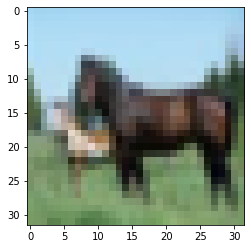

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[12], cmap='Greys')
plt.show()

In [14]:
y_test_hot.shape

(10000, 10)

In [15]:
#Splitting the dataset
from sklearn.model_selection import  train_test_split
X_new_train, X_new_test, y_new_train, y_new_test=train_test_split(X_train,y_train_hot, test_size=0.8, random_state=42)

In [16]:
X_new_train.shape, X_new_test.shape, y_new_train.shape, y_new_test.shape

((10000, 32, 32, 3), (40000, 32, 32, 3), (10000, 10), (40000, 10))

In [17]:
#Defining layer parameters
batch_size=32
epochs=50
activations='sigmoid'
num_classes=10

In [18]:
model=Sequential()
model.add(Flatten())
model.add(Dense(512, input_shape=(32,32,3)))
model.add(Activation('sigmoid'))


model.add(Dense(512,))
model.add(Activation('sigmoid'))

model.add(Dense(1024,))
model.add(Activation('sigmoid'))

model.add(Dense(1024,))
model.add(Activation('sigmoid'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))



In [19]:
#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_new_train, y_new_train, batch_size=batch_size, epochs=epochs, verbose=1,\
         validation_data=(X_test, y_test_hot))          

Epoch 1/50
313/313 [==============================] - 5s 15ms/step - loss: 2.3042 - accuracy: 0.1277 - val_loss: 2.1662 - val_accuracy: 0.1493
Epoch 2/50
313/313 [==============================] - 5s 16ms/step - loss: 2.1498 - accuracy: 0.1678 - val_loss: 2.1514 - val_accuracy: 0.1800
Epoch 3/50
313/313 [==============================] - 5s 16ms/step - loss: 2.1029 - accuracy: 0.1867 - val_loss: 2.0795 - val_accuracy: 0.1844
Epoch 4/50
313/313 [==============================] - 5s 16ms/step - loss: 2.0744 - accuracy: 0.2146 - val_loss: 2.1311 - val_accuracy: 0.2059
Epoch 5/50
313/313 [==============================] - 5s 15ms/step - loss: 2.0345 - accuracy: 0.2212 - val_loss: 2.0143 - val_accuracy: 0.2450
Epoch 6/50
313/313 [==============================] - 5s 16ms/step - loss: 2.0013 - accuracy: 0.2365 - val_loss: 2.0209 - val_accuracy: 0.2379
Epoch 7/50
313/313 [==============================] - 5s 16ms/step - loss: 1.9882 - accuracy: 0.2433 - val_loss: 1.9611 - val_accuracy: 0.2565

In [20]:
history.history

{'loss': [2.304161787033081,
  2.149817943572998,
  2.102918863296509,
  2.0743696689605713,
  2.0345261096954346,
  2.001326560974121,
  1.9881713390350342,
  1.9547709226608276,
  1.9402096271514893,
  1.9282132387161255,
  1.9018594026565552,
  1.885478138923645,
  1.8752968311309814,
  1.8452695608139038,
  1.8322815895080566,
  1.813153862953186,
  1.8030295372009277,
  1.8006978034973145,
  1.7868924140930176,
  1.7720118761062622,
  1.7493929862976074,
  1.747170090675354,
  1.7275724411010742,
  1.7226495742797852,
  1.7184042930603027,
  1.7030479907989502,
  1.7010555267333984,
  1.687745451927185,
  1.657022476196289,
  1.6508758068084717,
  1.6321133375167847,
  1.6458991765975952,
  1.610656976699829,
  1.606765866279602,
  1.620874285697937,
  1.604605793952942,
  1.5993901491165161,
  1.5775479078292847,
  1.5809458494186401,
  1.5664582252502441,
  1.556227207183838,
  1.5408090353012085,
  1.5396941900253296,
  1.511972188949585,
  1.524439811706543,
  1.50779986381530

In [21]:
model.evaluate(X_test, y_test_hot)#Model test evaluation

313/313 [==============================] - 1s 3ms/step - loss: 1.7851 - accuracy: 0.3670


[1.7850630283355713, 0.367000013589859]

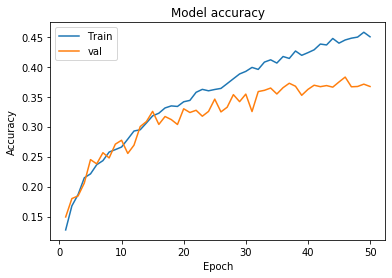

In [22]:
#Plotting graph of the accuracies of the MLP VS the Validation Accuracies
epoch_range=range(1, epochs+1)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()







In [23]:
history.history['accuracy']#history accuracy

[0.12770000100135803,
 0.16779999434947968,
 0.1867000013589859,
 0.21459999680519104,
 0.22120000422000885,
 0.23649999499320984,
 0.24330000579357147,
 0.25760000944137573,
 0.26170000433921814,
 0.26600000262260437,
 0.2791999876499176,
 0.29269999265670776,
 0.2948000133037567,
 0.3061000108718872,
 0.3179999887943268,
 0.3224000036716461,
 0.3312000036239624,
 0.3346000015735626,
 0.3337000012397766,
 0.34150001406669617,
 0.34380000829696655,
 0.3573000133037567,
 0.362199991941452,
 0.3598000109195709,
 0.3619999885559082,
 0.3637999892234802,
 0.3718000054359436,
 0.3799000084400177,
 0.3878999948501587,
 0.3921999931335449,
 0.39879998564720154,
 0.3955000042915344,
 0.4077000021934509,
 0.4115000069141388,
 0.40610000491142273,
 0.4169999957084656,
 0.4138000011444092,
 0.4262000024318695,
 0.4189999997615814,
 0.42340001463890076,
 0.42820000648498535,
 0.43779999017715454,
 0.43630000948905945,
 0.4471000134944916,
 0.439300000667572,
 0.444599986076355,
 0.4476000070571899

In [24]:
history.history['val_accuracy']#val_accuracy

[0.1492999941110611,
 0.18000000715255737,
 0.18440000712871552,
 0.20589999854564667,
 0.24500000476837158,
 0.2379000037908554,
 0.2565000057220459,
 0.24779999256134033,
 0.27079999446868896,
 0.27730000019073486,
 0.25529998540878296,
 0.26910001039505005,
 0.3000999987125397,
 0.3084999918937683,
 0.3255000114440918,
 0.3037000000476837,
 0.31690001487731934,
 0.3118000030517578,
 0.303600013256073,
 0.329800009727478,
 0.32359999418258667,
 0.3273000121116638,
 0.3174000084400177,
 0.3253999948501587,
 0.3458999991416931,
 0.3246000111103058,
 0.33239999413490295,
 0.35339999198913574,
 0.3416999876499176,
 0.35429999232292175,
 0.32519999146461487,
 0.35850000381469727,
 0.36059999465942383,
 0.3643999993801117,
 0.3544999957084656,
 0.36500000953674316,
 0.3723999857902527,
 0.36739999055862427,
 0.3522999882698059,
 0.3621000051498413,
 0.36910000443458557,
 0.3666999936103821,
 0.3684999942779541,
 0.3659000098705292,
 0.37450000643730164,
 0.38269999623298645,
 0.36649999022

In [25]:
model_CNN1=Sequential()

In [26]:
model_CNN1.add(Conv2D(64, kernel_size=(3,3,), activation='relu', input_shape=(32,32,3), padding='same'))

In [27]:
model_CNN1.add(Conv2D(64, kernel_size=(3,3,), activation='relu', padding='same'))

In [28]:
model_CNN1.add(Dense(512,))
model_CNN1.add(Activation('sigmoid'))

In [29]:
model_CNN1.add(Dense(512,))
model_CNN1.add(Activation('sigmoid'))

In [30]:
model_CNN1.add(Flatten())

In [31]:
model_CNN1.add(Dense(num_classes, activation='softmax'))

In [32]:
model_CNN1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [33]:
history=model_CNN1.fit(X_new_train, y_new_train, batch_size=batch_size,epochs=epochs,verbose=1,\
                      validation_data=(X_test, y_test_hot))


Epoch 1/50
313/313 [==============================] - 160s 510ms/step - loss: 10.5467 - accuracy: 0.1011 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/50
313/313 [==============================] - 162s 516ms/step - loss: 2.3027 - accuracy: 0.0935 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 3/50
313/313 [==============================] - 162s 518ms/step - loss: 2.3025 - accuracy: 0.1024 - val_loss: 2.3028 - val_accuracy: 0.1031
Epoch 4/50
313/313 [==============================] - 162s 519ms/step - loss: 2.3024 - accuracy: 0.1040 - val_loss: 2.3027 - val_accuracy: 0.1033
Epoch 5/50
313/313 [==============================] - 165s 526ms/step - loss: 2.3022 - accuracy: 0.1043 - val_loss: 2.3024 - val_accuracy: 0.1051
Epoch 6/50
313/313 [==============================] - 160s 512ms/step - loss: 2.3019 - accuracy: 0.1043 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 7/50
313/313 [==============================] - 161s 513ms/step - loss: 2.3012 - accuracy: 0.1142 - val_loss: 2.3007 

In [34]:
model_CNN1.evaluate(X_test, y_test_hot)

313/313 [==============================] - 42s 134ms/step - loss: 6.6319 - accuracy: 0.3565


[6.63186502456665, 0.3564999997615814]

In [35]:
history.history

{'loss': [10.54673957824707,
  2.302729845046997,
  2.302497148513794,
  2.302381992340088,
  2.302227735519409,
  2.301877021789551,
  2.3012170791625977,
  2.2963926792144775,
  2.2404088973999023,
  2.082395076751709,
  1.8706761598587036,
  1.748293161392212,
  1.6622394323349,
  1.5833812952041626,
  1.506142258644104,
  1.4460502862930298,
  1.3896796703338623,
  1.3321750164031982,
  1.2666493654251099,
  1.1737985610961914,
  1.0529522895812988,
  0.8849974870681763,
  0.7294132113456726,
  0.5699196457862854,
  0.4323030710220337,
  0.3262101411819458,
  0.24741564691066742,
  0.18793536722660065,
  0.13480441272258759,
  0.10730632394552231,
  0.08572341501712799,
  0.06936019659042358,
  0.053851328790187836,
  0.04155128449201584,
  0.042754966765642166,
  0.05881498381495476,
  0.04247959703207016,
  0.023765671998262405,
  0.012855732813477516,
  0.008709102869033813,
  0.0065773543901741505,
  0.005109292920678854,
  0.004143252037465572,
  0.00335515895858407,
  0.00433

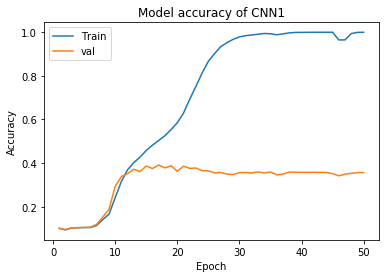

In [37]:
epoch_range=range(1, epochs+1)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model accuracy of CNN1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [38]:
model_CNN2=Sequential()
model_CNN2.add(Conv2D(64, kernel_size=(3,3,), activation='relu', input_shape=(32,32,3), padding='same'))
model_CNN2.add(MaxPooling2D((2, 2),padding='same'))
model_CNN2.add(Conv2D(64, kernel_size=(3,3,), activation='relu', input_shape=(32,32,3), padding='same'))
model_CNN2.add(MaxPooling2D((2, 2),padding='same'))
model_CNN2.add(Dense(512,))
model_CNN2.add(Activation('sigmoid'))
model_CNN2.add(Dropout(0.22))
model_CNN2.add(Dense(512,))
model_CNN2.add(Activation('sigmoid'))
model_CNN2.add(Dropout(0.22))
model_CNN2.add(Flatten())
model_CNN2.add(Dense(num_classes, activation='softmax'))
model_CNN2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history=model_CNN2.fit(X_new_train, y_new_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test_hot))









Epoch 1/50
313/313 [==============================] - 25s 80ms/step - loss: 2.7078 - accuracy: 0.1000 - val_loss: 2.3020 - val_accuracy: 0.0978
Epoch 2/50
313/313 [==============================] - 26s 83ms/step - loss: 2.2568 - accuracy: 0.1301 - val_loss: 2.0945 - val_accuracy: 0.2201
Epoch 3/50
313/313 [==============================] - 27s 85ms/step - loss: 1.9558 - accuracy: 0.2812 - val_loss: 1.9432 - val_accuracy: 0.2802
Epoch 4/50
313/313 [==============================] - 27s 86ms/step - loss: 1.8532 - accuracy: 0.3206 - val_loss: 1.8320 - val_accuracy: 0.3439
Epoch 5/50
313/313 [==============================] - 27s 86ms/step - loss: 1.7877 - accuracy: 0.3498 - val_loss: 1.7320 - val_accuracy: 0.3684
Epoch 6/50
313/313 [==============================] - 27s 85ms/step - loss: 1.7077 - accuracy: 0.3789 - val_loss: 1.6386 - val_accuracy: 0.4045
Epoch 7/50
313/313 [==============================] - 28s 88ms/step - loss: 1.6150 - accuracy: 0.4112 - val_loss: 1.6202 - val_accuracy:

In [39]:
model_CNN2.evaluate(X_test, y_test_hot)

313/313 [==============================] - 5s 15ms/step - loss: 2.4103 - accuracy: 0.5397


[2.4102957248687744, 0.5396999716758728]

In [40]:
history.history

{'loss': [2.7078423500061035,
  2.2568273544311523,
  1.9557888507843018,
  1.8532236814498901,
  1.787723183631897,
  1.7077134847640991,
  1.6150082349777222,
  1.5431610345840454,
  1.4882428646087646,
  1.443949580192566,
  1.381867527961731,
  1.3440721035003662,
  1.3052841424942017,
  1.2654815912246704,
  1.238112211227417,
  1.181269645690918,
  1.1381733417510986,
  1.0965783596038818,
  1.065002202987671,
  1.0258904695510864,
  0.9641913175582886,
  0.9213930368423462,
  0.8771642446517944,
  0.8279038071632385,
  0.7909221053123474,
  0.7494259476661682,
  0.6938828825950623,
  0.6500276923179626,
  0.5903455018997192,
  0.5680471658706665,
  0.5237314701080322,
  0.46652230620384216,
  0.43935897946357727,
  0.3943037688732147,
  0.36466097831726074,
  0.3247933089733124,
  0.297176331281662,
  0.2684909701347351,
  0.2516925632953644,
  0.22590024769306183,
  0.2050592303276062,
  0.1861691176891327,
  0.1926041692495346,
  0.16494041681289673,
  0.15241965651512146,
  0

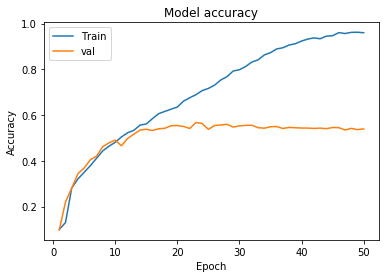

In [41]:
epoch_range=range(1, epochs+1)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()